In [2]:
from alan_lib import *
import matplotlib.pyplot as plt
import numpy as np

# Laguerre's method

In [ ]:
Linsolve.Laguerre_solve([1, -1, -7, 1, 6], guess = [1, 1, 1, 1])

[1,
 np.float64(-0.9999999999999651),
 np.float64(2.999999999999993),
 np.float64(-2.0000000000000275)]

: 

# Shooting and BVP

In [3]:
shooting = Integrate.shooting

def x_dot(u, v):
    # u' = v
    return v

def y_dot(u, v):
    # v' = -u
    return -u


gl = shooting(x_dot, y_dot, 0.5, [0, 1], [0, np.pi/2])
gh = shooting(x_dot, y_dot, 1.5, [0, 1], [0, np.pi/2])

sol = Integrate.BVP(x_dot, y_dot, [gl, gh], [0, 1], [0, np.pi/2])

# LU Decomposition

In [2]:
A = [[3, -2, 5],
     [1, 4, -1],
     [6, 0, 2]]

Ain = LinAlg.LU_inverse(A)

print(LinAlg.matmul(A, Ain))

[[1.0, 0.0, 0.0], [-0.0, 1.0, 0.0], [-0.0, -0.0, 1.0]]


# RK-4

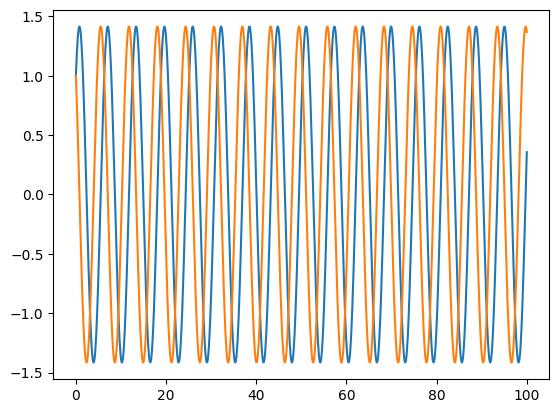

In [2]:
def X_dot(X):
        x, y = X
        x_dot = y
        y_dot = -x
        return np.array([x_dot, y_dot])

init = [1, 1]
t, X = Integrate.Runge_kutta_vectorised(X_dot, init, [0, 100])
x, y = X[:, 0], X[:, 1]

plt.plot(t, x)
plt.plot(t, y)
plt.show()

In [ ]:

Conversation opened. 1 read message.

Skip to content
Using NISER Mail with screen readers
in:sent 

1 of 279
(no subject)

Alan Ajay <alan.ajay@niser.ac.in>
9:54 AM (9 minutes ago)
to ALAN

def quad_least_square_fit(x, y):
    n = len(x)

    # Compute required summations
    Sx = sum(x)
    Sx2 = sum(xi*xi for xi in x)
    Sx3 = sum(xi*xi*xi for xi in x)
    Sx4 = sum(xi*xi*xi*xi for xi in x)

    Sy = sum(y)
    Sxy = sum(x[i]*y[i] for i in range(n))
    Sx2y = sum((x[i]**2)*y[i] for i in range(n))

    # System matrix (normal equations)
    A = [
        [n, Sx, Sx2],
        [Sx, Sx2, Sx3],
        [Sx2, Sx3, Sx4]
    ]
    B = [Sy, Sxy, Sx2y]

    # -------- Gaussian Elimination ----------
    for i in range(3):
        # Make diagonal = 1
        pivot = A[i][i]
        for j in range(i,3):
            A[i][j] /= pivot
        B[i] /= pivot

        # Eliminate below
        for k in range(i+1,3):
            factor = A[k][i]
            for j in range(i,3):
                A[k][j] -= factor*A[i][j]
            B[k] -= factor*B[i]

    # Back substitution
    a2 = B[2]
    a1 = B[1] - A[1][2]*a2
    a0 = B[0] - A[0][1]*a1 - A[0][2]*a2

    return a0, a1, a2


# ---------------- Example ----------------
x_data = [0,1,2,3,4]
y_data = [1.1,2.0,4.1,6.0,8.2]

a0, a1, a2 = quad_least_square_fit(x_data, y_data)
print("Quadratic Fit: y = {:.4f} + {:.4f}x + {:.4f}x²".format(a0,a1,a2))

Warm regards,  
ALAN AJAY,
Integrated MSc. Batch 2023-28,
School of Physical Sciences,
National Institute of Science Education and Research (NISER).
